# Exercise Sheet 3

## Machine learning basics

### Deadline: 02.12.2020 23:59

**Instructions:**
Insert your code in the *TODO* sections ans type your answers in the *Answer* cells. <br>

Names and teams IDs: Vilém Zouhar vizo00001, Pauline Sander s8pasand

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## 1 Implementing regression

In this exercise we will practice implementing regression on the Titanic dataset using the package *sklearn*. <br>
<a href="https://www.kaggle.com/c/titanic">Titanic dataset </a> contains the data about passengers of the ship and information whether they survived or not. <br>
In the materials for this exercise you can find the file *titanic.csv*. This file contains preprocessed data with information about passenger ID, age, class, and *price* of their ticket.

**1.1 Load the data as a pandas dataframe, using <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> method**

In [231]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Age,Price
0,1,0,3,22.0,7.2500
1,2,1,1,38.0,71.2833
2,3,1,3,26.0,7.9250
3,4,1,1,35.0,26.5500
4,5,0,3,35.0,8.0500


**Look at the data and report which variables are continuous, nominal, ordinal. (0.5 points)** 

Ordinal: PassengerId, Pclass

Continuous: Age, Price

Nominal, Survived

(Pclass could also be considered nominal, but because there is some ordering we classified it as ordinal)

**1.2 Here we will implement a simple linear regression and try to see if we can predict the *price* of the ticket based on the *age* of the passenger (0.5 points)** <br>
Consult the documentation on <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression class </a> in sklearn

In [232]:
model = LinearRegression().fit(titanic[['Age']], titanic['Price'])


**What are the parameters of the model that we fit? Hint: the parametrs are the attributes of the model, consult the documentation.**

In [233]:
print(f'Coef: {model.coef_[0]:.2f}, Offset: {model.intercept_:.2f}')

Coef: 0.34, Offset: 8.78


**1.3 Write the formula of the fitted regression. (0.5 points)**

Price ~= 0.34 * Age + 8.78

**1.4 Let us see how good are the estimated values of the model. (0.5 points)** <br>
Write the formula for Mean Squared Error and calculate the value for our age~price model. <br>
Check if you calculated it correctly using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html"> mean_squared_error method </a> from sklearn.metrics

$$ MSE (f, X, Y) = \frac{1}{|X|} \sum_i^{|X|} (Y_i-f(X_i))^2 $$

In [234]:
titanic['PredictedPrice'] = model.predict(titanic[['Age']])
 
mse_our = sum((titanic['PredictedPrice'] - titanic['Price'])**2) / len(titanic)
mse_gld = mean_squared_error(titanic['PredictedPrice'], titanic['Price'])
print('MSE our: ', mse_our)
print('MSE gold:', mse_gld)

MSE our:  433.03541836274667
MSE gold: 433.0354183627467


**1.5 Get predictions of your model (hint: there is a corresponding method) and plot them with the original data on the same graph. (1 point)** <br>


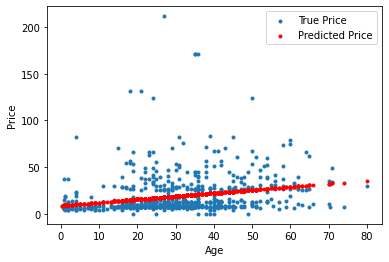

In [235]:
def plt_predicted_price_linear(xvar):
    plt.scatter(titanic[xvar], titanic['Price'], label='True Price', marker='.')
    plt.scatter(titanic[xvar], titanic['PredictedPrice'], label='Predicted Price', marker='.', color='red')
    plt.xlabel(xvar)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
plt_predicted_price_linear('Age')

Is Age a good predictor for the Price of the ticket? Have a look at the data again. Is there a better predictor? <br>
**1.6 Choose another predictor and repeat the same steps (1.2-1.5). Report the better predictor. (0.5 points)**

Coef: -17.07, Offset: 56.91
Price ~= -17.07 * Class + 56.91
MSE : 252.25678322689726


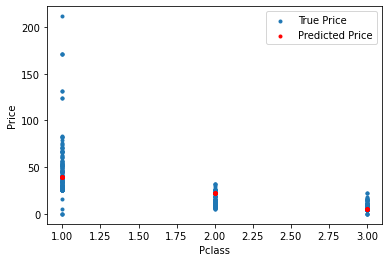

In [236]:
model = LinearRegression().fit(titanic[['Pclass']], titanic['Price'])

print(f'Coef: {model.coef_[0]:.2f}, Offset: {model.intercept_:.2f}')
print(f'Price ~= {model.coef_[0]:.2f} * Class + {model.intercept_:.2f}')

titanic['PredictedPrice'] = model.predict(titanic[['Pclass']])
mse_gld = mean_squared_error(titanic['PredictedPrice'], titanic['Price'])
print('MSE :', mse_gld)
plt_predicted_price_linear('Pclass')

We can go on and try to improve the fit even more by increasing the complexity of the model.<br>
**1.7 Consult this <a href="https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/">Tutorial</a> and fit polynomial regressions using the better predictor. (1.5 points)**<br>
1) Fit regressions of order 2, 5, and 10. <br>
2) Get parameters of the models and write down the equations for each model inserting the fitted parameters. <br>
3) Compute MSE for each model and compare them. Does increasing the capacity of the model improve its performance? <br>

In [237]:
def fit_poly(degree, predictor):
    model = Pipeline([
        ('polynomial', PolynomialFeatures(degree=degree)),
        ('modal', LinearRegression())
    ])
    model.fit(titanic[[predictor]]), titanic['Price'])
    titanic['PredictedPrice'] = model.predict(titanic[[predictor]])
    mse_gld = mean_squared_error(titanic['PredictedPrice'], titanic['Price'])
    print('Degree', degree)
    print('MSE :', mse_gld)
    print('Price ~=', ' + '.join([f'{v:.2f} x^{i}' for i,v in enumerate(model[1].coef_)]) + '\n')

    plt.scatter(titanic[predictor], titanic['PredictedPrice'], label=f'Degree {degree}', marker='x')
    
predictor = 'Pclass'
plt.scatter(titanic[predictor], titanic['Price'], label='True Price', marker='.')
fit_poly(2, predictor)
fit_poly(5, predictor)
fit_poly(10, predictor)
plt.xlabel(predictor)
plt.ylabel('Price')
plt.legend()
plt.show()

SyntaxError: unmatched ')' (<ipython-input-237-2b5fa9f05cc1>, line 8)

Now we will try to predict if a passenger survived based on the passenger class. <br>
Whether a passenger survived or not is a categorical variable, so we have to implement a **logistic** regression. <br>
Logistic regression will be covered in the lecture on the 1st of December, but you can already get acquainted with it in <a href = "https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc">this post</a>.

**1.8 Fit a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> logistic regression </a> predicting if a passenger has survived based on their class. (0.5 points)** <br>



In [216]:
model = LogisticRegression().fit(titanic[['Pclass']], titanic['Survived'])
titanic['PredictedSurvived'] = model.predict(titanic[['Pclass']])
titanic[['PredictedSurvivedProbN', 'PredictedSurvivedProbP']] = model.predict_proba(titanic[['Pclass']])

**1.9 Cross entropy loss. (1 point)** <br>
The measure that we use for estimating the error of a logistic regression is *Cross Entropy Loss*. <br>
Here is a good <a href="https://www.youtube.com/watch?v=jKQI75qKm3A"> video </a> explaining Maximum Likelihood Estimation and Cross Entropy Loss. <br>
Write the formula for Cross Entropy Loss and calculate the error of your model using this formula. Check your answer using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html"> log_loss </a> method from sklearn.

*Cross Entropy Loss formula*:

$$ H[p,q] = - \sum_{o\in O} p(o) log[q(o)] $$

In our case, the possible observations are $0$ or $1$. The loss of the prediced data is the average of loss for individual examples.

In [198]:
loss_our = sum(-titanic['Survived']*np.log(titanic['PredictedSurvivedProbP'])-(1-titanic['Survived'])*np.log(titanic['PredictedSurvivedProbN']))/len(titanic)
loss_gld = log_loss(titanic['Survived'], titanic['PredictedSurvivedProbP'])
print('Cross-Entropy our: ', loss_our)
print('Cross-Entropy gold:', loss_gld)

MSE our:  0.6097604720869241
MSE gold: 0.6097604720869179


**1.10 Fit a multiple logistic regression (0.5 points)** <br>
Now let's check if the Age of a passenger also had an influence on their survival chances. <br>
Fit a model with 2 predictors, compute the loss. Compare with the previous model.

In [229]:
model = LogisticRegression().fit(titanic[['Pclass', 'Age']], titanic['Survived'])
titanic['PredictedSurvived'] = model.predict(titanic[['Pclass', 'Age']])
titanic[['PredictedSurvivedProbN', 'PredictedSurvivedProbP']] = model.predict_proba(titanic[['Pclass', 'Age']])
loss = log_loss(titanic['Survived'], titanic['PredictedSurvivedProbP'])
print('Loss:', loss)

Loss: 0.5794472607802827


## 2 Evaluating the performance of a model

**2.1 Give definitions of terms overfitting and underfitting. <br>
How can we check if the model underfits, overfits or is optimal? (1 point)**

Overfitting: The model has too high capacity (or uses too much of it by overtraining), which is used to improve train data performance but based on features, which do not generalize to other data.

Underfitting: The model has too low capacity (or has not been trained long enough) and can not describe even features that would otherwise be useful in application to other data.

With an intrisic approach, one could examine parameters and check, that they are in expected bounds. This is done by parameter regularization. More common approach is to have a validation dataset which is evaluated after training. If both the train and evaluation dataset have low performance, the model underfits. If the training data are fitted well, but the model performs bad on the evaluation data, it is overfited.
A variant of this is to use cross validation, which is more computationally demanding, but delivers more stable reports.

**2.2 Evaluation metrics (2 points)**<br>
Watch this <a href="https://www.youtube.com/watch?v=wpQiEHYkBys">video about evaluation metrics</a>. <br>
Discuss the differences between Accuracy, Precision, Recall, F1, MCC (Mathews Correlation Coeffcient): <br>
1. How are they calculated? <br>
2. In which case can a model get the perfect score? <br>
3. Give examples of situations when you would prefer one over the others. <br>
4. Getting back to our Titanic case: Imagine that you have to predict if the passenger survived or not and pass this information to the families. Which metric would you use? Why?

### 1

Assuming we have computed the confusion matrix.

Accuracy: $ \frac{TP+TN}{TP+TN+FP+FN} $

Precision: $ \frac{TP}{TP+FP} $

Recall: $ \frac{TP}{TP+FN} $

F1: $ \frac{2\cdot Prec \cdot Rec}{Prec + Rec} $

MCC: $ \frac{TP\cdot TN - FP\cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}} $

### 2

The perfect score in all metrics can be achieved by having $ FN = FP = 0 $.

### 3

Any scenario in which the classes are imbalanced. For medical applications higher recall is more important in most cases (and positive instances are followed up with a more expensive test with higher precision). Accuracy could in this case by very high by always predicting the most common class (not sick), which is not intended. Usually we want some balance between these two, which results in $F_\beta$

### 4

Definietly high precision. It is fairy "straightforward" to tell someone that their acquaintance passed away and acceptable to not say anything if we do not have the information. It is much more difficult to announce death but then later having to correct it.